In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

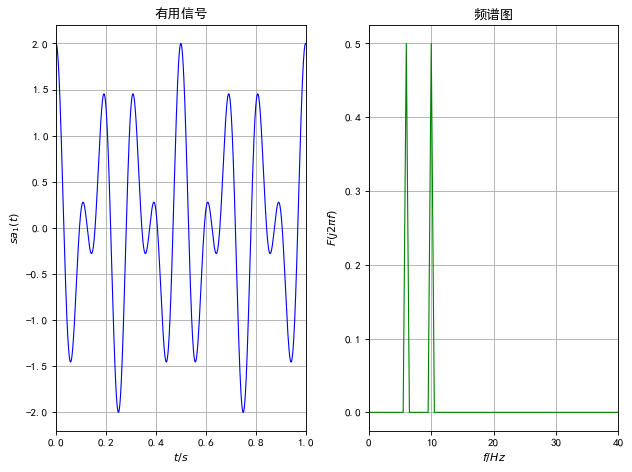

In [3]:
f1 = 10; f2 = 6; f3 = 36; f4 = 25;
t = np.arange(0.0, 2.0, 0.001)
f = np.arange(0.0, 1000.0, 0.5)
sa1 = np.cos(2.0*np.pi*f1*t) + np.cos(2.0*np.pi*f2*t)
sa2 = 10*np.cos(2.0*np.pi*f3*t) + 10*np.cos(2.0*np.pi*f4*t)
xa = sa1 + sa2
F1 = np.fft.fft(sa1)
F2 = np.fft.fft(sa2)
F3 = np.fft.fft(xa)

plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
plt.plot(t, sa1, 'b', linewidth =1.0)
plt.xlim(0, 1)
plt.xlabel('$t/s$')
plt.ylabel('$sa_1(t)$')
plt.title('有用信号')
plt.grid()

plt.subplot(122)
plt.plot(f, 0.5*abs(F1)/max(abs(F1)), 'g', linewidth =1.0)
plt.xlim(0, 40)
plt.xlabel('$f/Hz$')
plt.ylabel('$F(j2\pi f)$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

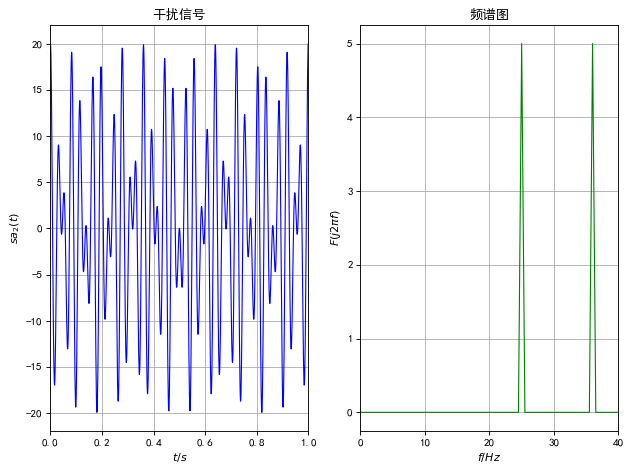

In [4]:
plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
plt.plot(t, sa2, 'b', linewidth =1.0)
plt.xlim(0, 1)
plt.xlabel('$t/s$')
plt.ylabel('$sa_2(t)$')
plt.title('干扰信号')
plt.grid()

plt.subplot(122)
plt.plot(f, 5*abs(F2)/max(abs(F2)), 'g', linewidth =1.0)
plt.xlim(0, 40)
plt.xlabel('$f/Hz$')
plt.ylabel('$F(j2\pi f)$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

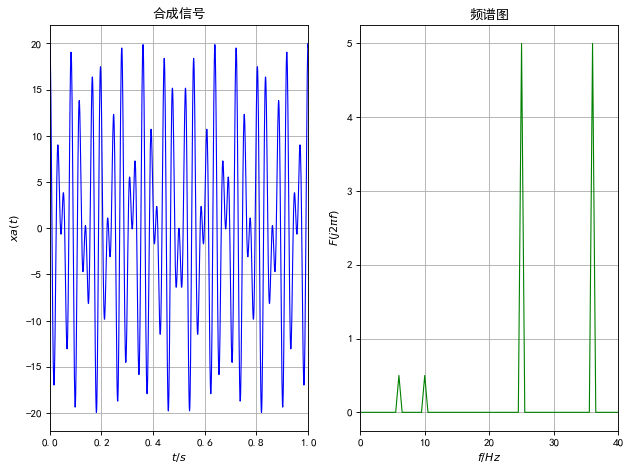

In [5]:
plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
plt.plot(t, sa2, 'b', linewidth =1.0)
plt.xlim(0, 1)
plt.xlabel('$t/s$')
plt.ylabel('$xa(t)$')
plt.title('合成信号')
plt.grid()

plt.subplot(122)
plt.plot(f, 5*abs(F3)/max(abs(F3)), 'g', linewidth =1.0)
plt.xlim(0, 40)
plt.xlabel('$f/Hz$')
plt.ylabel('$F(j2\pi f)$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

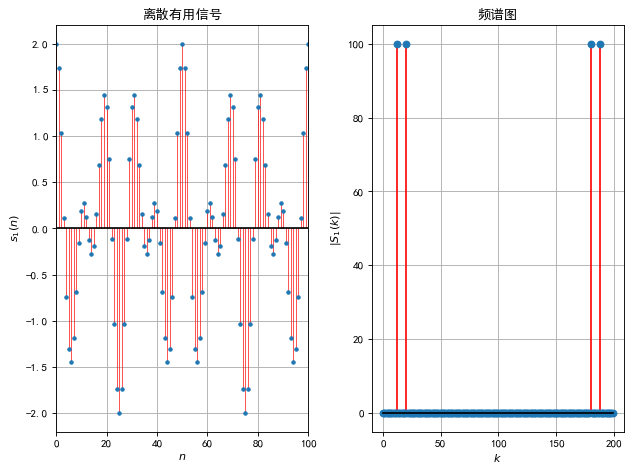

In [6]:
nt = np.arange(0.0, 2.0, 0.01)
k = np.arange(0.0, 200.0, 1.0)
sn1 = np.cos(2.0*np.pi*f1*nt) + np.cos(2.0*np.pi*f2*nt)
sn2 = 10*np.cos(2.0*np.pi*f3*nt) + 10*np.cos(2.0*np.pi*f4*nt)
xn = sn1 + sn2
Fn1 = np.fft.fft(sn1)
Fn2 = np.fft.fft(sn2)
Fn3 = np.fft.fft(xn)

plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
markerline, stemlines, baseline = plt.stem(k, sn1, linefmt='r', 
            basefmt='k-', markerfmt='C0.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 0.6)
plt.xlim(0, 100)
plt.xlabel('$n$')
plt.ylabel('$s_1(n)$')
plt.title('离散有用信号')
plt.grid()

plt.subplot(122)
plt.stem(k, abs(Fn1), linefmt='r', basefmt='k-',
         markerfmt='C0o', use_line_collection=True)
plt.xlabel('$k$')
plt.ylabel('$|S_1(k)|$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

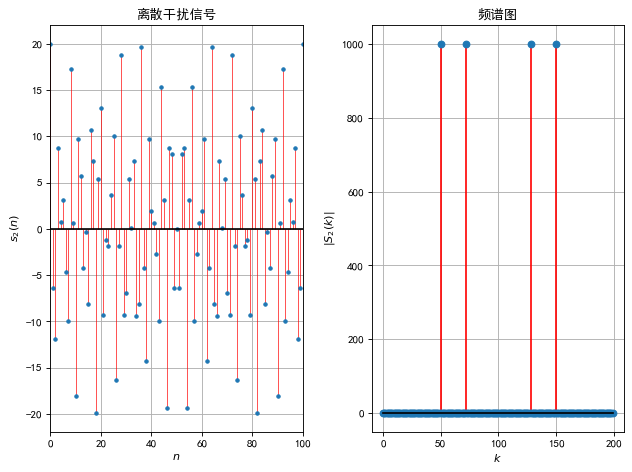

In [7]:
plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
markerline, stemlines, baseline = plt.stem(k, sn2, linefmt='r', 
        basefmt='k-', markerfmt='C0.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 0.6)
plt.xlim(0, 100)
plt.xlabel('$n$')
plt.ylabel('$s_2(n)$')
plt.title('离散干扰信号')
plt.grid()

plt.subplot(122)
plt.stem(k, abs(Fn2), linefmt='r', basefmt='k-', 
         markerfmt='C0o', use_line_collection=True)
plt.xlabel('$k$')
plt.ylabel('$|S_2(k)|$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

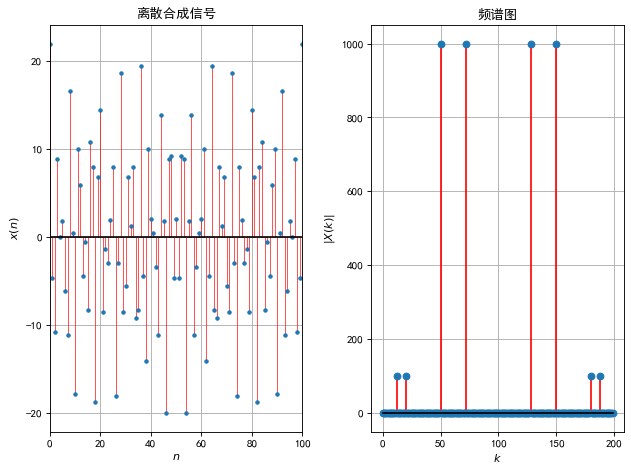

In [8]:
plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
markerline, stemlines, baseline = plt.stem(k, xn, linefmt='r', 
            basefmt='k-', markerfmt='C0.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 0.6)
plt.xlim(0, 100)
plt.xlabel('$n$')
plt.ylabel('$x(n)$')
plt.title('离散合成信号')
plt.grid()

plt.subplot(122)
plt.stem(k, abs(Fn3), linefmt='r', basefmt='k-',
         markerfmt='C0o', use_line_collection=True)
plt.xlabel('$k$')
plt.ylabel('$|X(k)|$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()

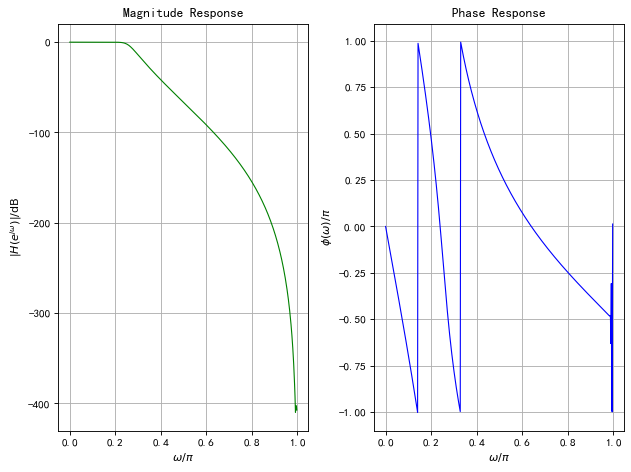

In [9]:
fp=12; fs=20; Fs=100;
Wp=2*fp/Fs; Ws=2*fs/Fs; Rp=1; Rs=40;
N, Wc = signal.buttord(Wp, Ws, Rp, Rs)
b, a = signal.butter(N, Wc, 'low')
w, h = signal.freqz(b, a)

plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'g', linewidth =1.0)
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|H(e^{j\omega})|/\mathrm{dB}$')
plt.title('Magnitude Response')
plt.grid()

plt.subplot(122)
plt.plot(w/np.pi, np.angle(h)/np.pi, 'b', linewidth =1.0)
plt.xlabel('$\omega/\pi$')
plt.ylabel('$\phi(\omega)/\pi$')
plt.title('Phase Response')
plt.grid()

plt.tight_layout()
plt.show()

E:\IDE\Anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


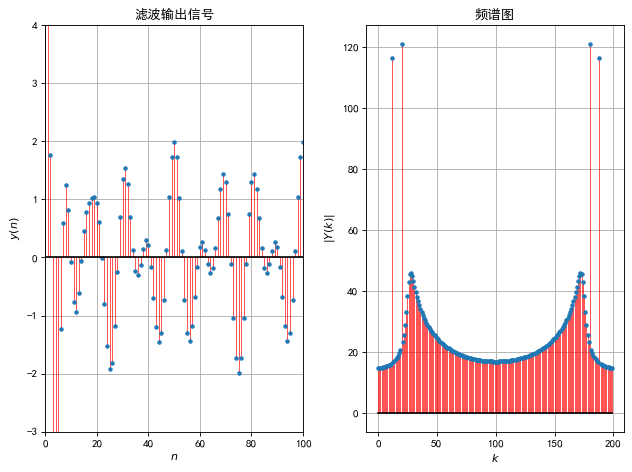

In [10]:
yn = signal.filtfilt(b, a, xn)
Yk = np.fft.fft(yn)

plt.figure(figsize =(8, 6), dpi =80)
plt.subplot(121)
markerline, stemlines, baseline = plt.stem(k, yn, linefmt='r', 
            basefmt='k-', markerfmt='C0.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 0.6)
plt.xlim(0, 100)
plt.ylim(-3, 4)
plt.xlabel('$n$')
plt.ylabel('$y(n)$')
plt.title('滤波输出信号')
plt.grid()

plt.subplot(122)
markerline, stemlines, baseline = plt.stem(k, abs(Yk), linefmt='r',
            basefmt='k-', markerfmt='C0.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 0.6)
plt.xlabel('$k$')
plt.ylabel('$|Y(k)|$')
plt.title('频谱图')
plt.grid()

plt.tight_layout()
plt.show()